# Xarray for multidimensional gridded data

We often deal with _multidimensional data_:

$$ T(t, y, x) $$

where $t$ is time, $y$ is latitude, and $x$ is longitude.

The point of xarray is to provide convenience for working with this type of data. 

![xarray data model](https://github.com/pydata/xarray/raw/master/doc/_static/dataset-diagram.png)

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('talk')

## Xarray data structures

Xarray has two fundamental data structures:
* a `DataArray`, which holds a single multi-dimensional variable and its coordinates
* a `Dataset`, which holds multiple variables that potentially share the same coordinates

### DataArray

A `DataArray` has four essential attributes:
* `values`: a `numpy.ndarray` holding the array’s values
* `dims`: dimension names for each axis (e.g., `('z', 'y', 'x')`)
* `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
* `attrs`: an `OrderedDict` to hold arbitrary metadata (attributes)

Let's start by constructing some DataArrays manually 

A simple DataArray without dimensions or coordinates isn't much use.

In [3]:
da = xr.DataArray([9, 0, 2, 1, 0])
da

<xarray.DataArray (dim_0: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: dim_0

We can add a dimension name...

In [4]:
da_1d = xr.DataArray([9, 0, 2, 1, 0], dims=['x'])
da_1d

<xarray.DataArray (x: 5)>
array([9, 0, 2, 1, 0])
Dimensions without coordinates: x

But things get most interesting when we add a coordinate:

In [5]:
da_1d = xr.DataArray([9, 0, 2, 1, 0],
                     dims=['x'],
                     coords={'x': [10, 20, 30, 40, 50]},
                     name="one-dim-data")
da_1d

<xarray.DataArray 'one-dim-data' (x: 5)>
array([9, 0, 2, 1, 0])
Coordinates:
  * x        (x) int64 10 20 30 40 50

Xarray has built-in plotting.

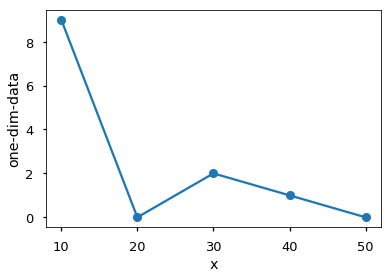

In [6]:
da_1d.plot(marker='o');

### A Multi-Dimensional DataArray

In [7]:
Nz, Ny, Nx = 100, 250, 150  # We unpack a tuple

da_random = xr.DataArray(np.random.randn(Nz, Ny, Nx),
                         dims=['z', 'y', 'x'],
                         coords={'z': np.arange(Nz),
                                 'y': np.linspace(-1, 1, Ny),
                                 'x': np.linspace(0, 1, Nx)},
                         name="random_data")

In [8]:
da_random

<xarray.DataArray 'random_data' (z: 100, y: 250, x: 150)>
array([[[ 2.346532, -0.206562, ..., -1.366458,  0.40402 ],
        [ 2.300139, -0.24497 , ...,  0.662796, -0.745453],
        ...,
        [ 0.322948, -1.756895, ...,  0.494037, -0.536196],
        [ 0.828131, -1.440898, ..., -0.875221, -0.632768]],

       [[ 0.087207,  0.144125, ...,  0.56349 , -1.582176],
        [-0.066721, -0.386578, ..., -1.388284, -2.696061],
        ...,
        [ 0.466175, -0.45326 , ...,  0.094307,  0.124459],
        [-0.290931,  0.643073, ..., -0.446936, -0.677054]],

       ...,

       [[-0.458492, -1.284293, ...,  0.223316,  0.346352],
        [ 0.677419,  0.127041, ..., -0.543249, -1.001929],
        ...,
        [ 0.877621, -0.637023, ...,  0.46069 ,  1.300371],
        [-0.056221,  0.661243, ..., -0.739099, -0.345161]],

       [[-0.150435,  0.346786, ...,  1.41149 ,  0.356056],
        [ 0.593488, -0.883996, ..., -0.891516,  0.184416],
        ...,
        [ 0.020932, -0.265336, ...,  1.072834

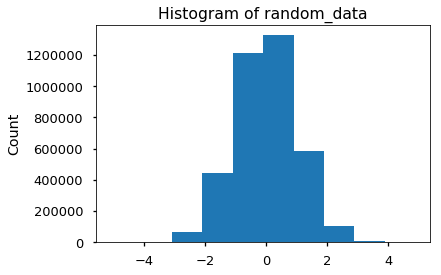

In [9]:
da_random.plot();

And we can apply functions directly along the named dimensions:

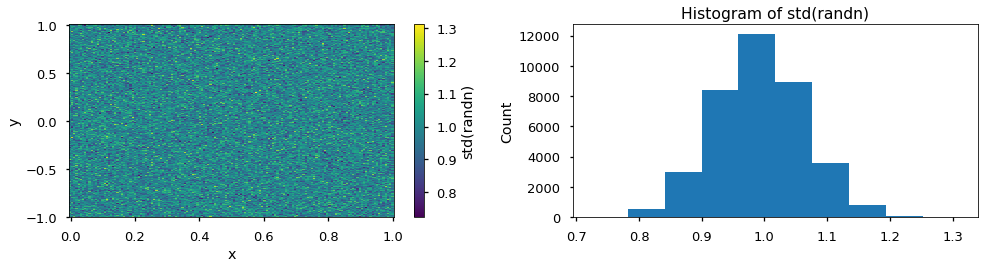

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

da_random.std("z").rename("std(randn)").plot(ax=ax[0]);
da_random.std("z").rename("std(randn)").plot.hist(ax=ax[1]);

fig.tight_layout()

## DataSets

Let's construct a Data-Set with two DataArrays

In [11]:
Nx, Ny = 150, 250

y = np.linspace(-1, 1, Ny)
x = np.linspace(0, 1, Nx)

random_data = xr.Dataset(
    data_vars={'random_2d': (('y', 'x'), np.random.randn(Ny, Nx)),
               'random_1d': (('x'), np.random.randn(Nx))},
    coords={'y': y, 'x': x})

Look at it.

In [12]:
random_data

<xarray.Dataset>
Dimensions:    (x: 150, y: 250)
Coordinates:
  * y          (y) float64 -1.0 -0.992 -0.9839 -0.9759 -0.9679 -0.9598 ...
  * x          (x) float64 0.0 0.006711 0.01342 0.02013 0.02685 0.03356 ...
Data variables:
    random_2d  (y, x) float64 -0.01306 -0.3016 -1.45 0.1412 0.9311 -1.234 ...
    random_1d  (x) float64 -1.658 0.6665 1.066 -0.5299 0.3178 -0.4557 ...

And notice we forgot to add a 3d variable we wanted to have in there.

In [13]:
Nz = 100
z = np.arange(Nz)

da_3d = xr.DataArray(
    np.random.randn(Nz, Ny, Nx),
    dims=('z', 'y', 'x'),
    coords={'z': z, 'y': y, 'x': x},
    name="random_3d")

random_data["random_3d"] = da_3d

In [14]:
random_data

<xarray.Dataset>
Dimensions:    (x: 150, y: 250, z: 100)
Coordinates:
  * y          (y) float64 -1.0 -0.992 -0.9839 -0.9759 -0.9679 -0.9598 ...
  * x          (x) float64 0.0 0.006711 0.01342 0.02013 0.02685 0.03356 ...
  * z          (z) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    random_2d  (y, x) float64 -0.01306 -0.3016 -1.45 0.1412 0.9311 -1.234 ...
    random_1d  (x) float64 -1.658 0.6665 1.066 -0.5299 0.3178 -0.4557 ...
    random_3d  (z, y, x) float64 -1.97 0.7995 -0.8204 -0.7968 0.6389 -1.219 ...

## Working with Labeled Data

Xarray's labels make working with multidimensional data much easier.

### Selecting Data (Indexing)

We can always use regular numpy indexing and slicing on DataArrays

However, it is often much more powerful to use xarray's `.sel()` method to use label-based indexing.

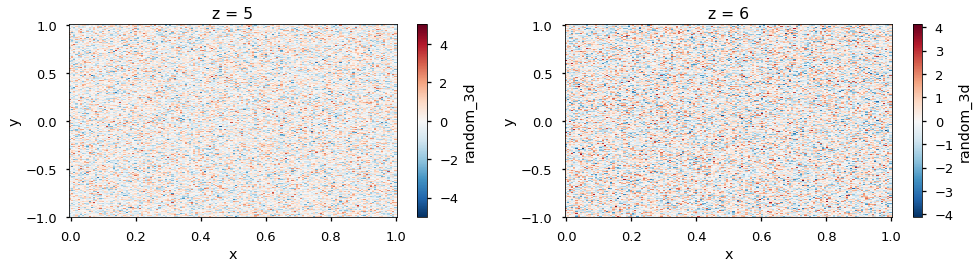

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

random_data.random_3d.sel(z=5.4, method='nearest').plot(ax=ax[0]);
random_data.random_3d.sel(z=5.6, method='nearest').plot(ax=ax[1]);

fig.tight_layout();

`.sel()` also supports slicing. Unfortunately we have to use a somewhat awkward syntax, but it still works.

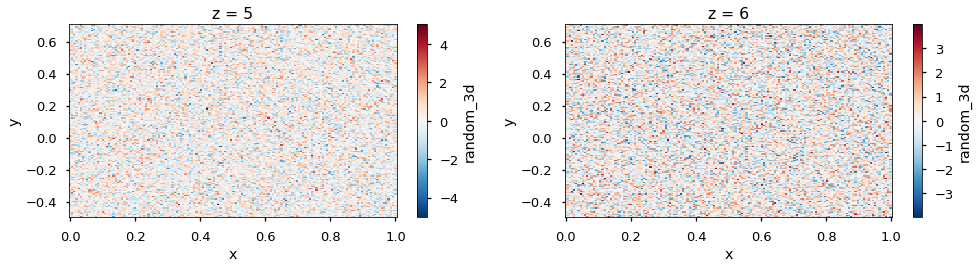

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

random_data.random_3d.sel(z=5.4, method='nearest').sel(y=slice(-0.5, 0.71)).plot(ax=ax[0]);
random_data.random_3d.sel(z=5.6, method='nearest').sel(y=slice(-0.5, 0.71)).plot(ax=ax[1]);

fig.tight_layout();

`.sel()` also works on the whole Dataset

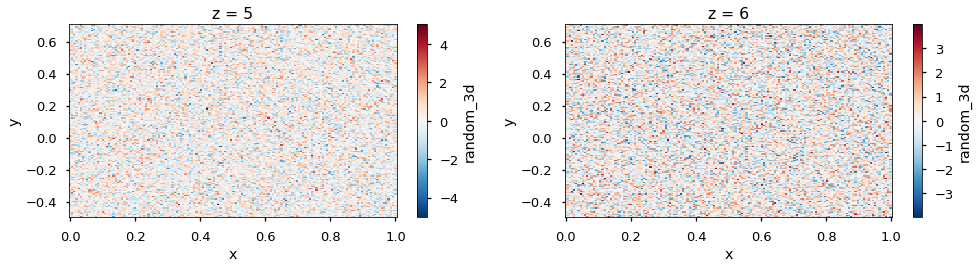

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

random_data.sel(z=5.4, method='nearest').sel(y=slice(-0.5, 0.71)).random_3d.plot(ax=ax[0]);
random_data.sel(z=5.6, method='nearest').sel(y=slice(-0.5, 0.71)).random_3d.plot(ax=ax[1]);

fig.tight_layout();

---

*This notebook is based on a notebook from the [CC BY-NC 4.0 licensed](https://creativecommons.org/licenses/by/4.0/) course notes on [research computing by Ryan Abernathey et al.](https://rabernat.github.io/research_computing/).  The original notebook was downloaded from <https://raw.githubusercontent.com/rabernat/research_computing/master/content/lectures/python/xarray.ipynb> on 2018-02-21.  To track modifications relative to this original version, please check the history of <https://git.geomar.de/edu/python-intro-201804/>.*